# Monte Carlo 

In [1]:
import numpy as np 
import pandas as pd 
from scipy.stats import norm # normal distribution 

# graphing 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme()
plt.rcParams.update({"text.usetex": True})

# reload our modules constantly (in case we make change)
%load_ext autoreload
%autoreload 2

# user 
import probit, logit, estimation as est 

# Running a single Monte Carlo step 

In [2]:
model = probit
t = 0.1 * np.ones((3,))
Y,X = model.sim_data(t, 100000)
t0 = model.starting_values(Y,X)
r = est.estimate(model.q, t0, Y, X)
pd.DataFrame({'t0':t, 'theta':r['theta'], 'se':r['se']})

Optimization terminated successfully.
         Current function value: 0.684374
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 6


,t0,theta,se
0,0.1,0.098246,0.003984
1,0.1,0.095341,0.004008
2,0.1,0.096630,0.003993


# Automating it 

In [3]:
%%time 
np.random.seed(1337) # so we get the same picture always 
K=2
t = .1 * np.ones((K,))
tab = est.monte_carlo(logit, t, N=100, R=1000)

Wall time: 8.78 s


In [4]:
mc_std = tab.groupby('k').theta.std().values
mc_std

array([0.20075687, 0.21170081])

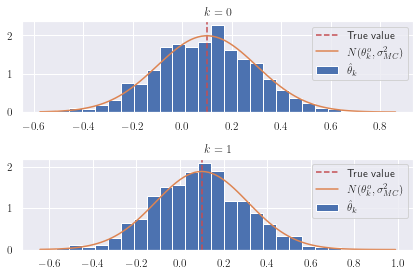

In [5]:
fig,axes=plt.subplots(K);
for k,t_ in enumerate(t): 
    ax = axes[k]
    tab[tab.k==k].hist('theta', bins=25, ax=ax, density=True, label='$\hat{\\theta}_k$');
    
    ymin,ymax = ax.get_ylim()
    xmin,xmax = ax.get_xlim()
    ax.axvline(t_, ymin, ymax, linestyle='--', color='r', label='True value')
    
    xx = np.linspace(xmin,xmax,100)
    ax.plot(xx, norm.pdf(xx, loc=t_, scale=mc_std[k]), label='$N(\\theta_k^o, \\sigma_{MC}^2)$')
    
    ax.legend()
    ax.set_title(f'$k = {k}$')

plt.tight_layout()
